# Stationarity
by **Professor Throckmorton**  
for *Time Series Econometrics*  
W&amp;M ECON 408/PUBP 616  
<a href="stationarity.slides.html">Slides</a>

## Summary

- Time-series data is either non-stationary or stationary.
- If the data is non-stationary, then the underlying probabilistic structure of the series is changing over time, and there is no way to relate the future to the past.
- A **stationary** time series
  - has statistical properties that do not change over time,
  - which allows us to build valid models.

## Definition of Stationary

- **Weak Stationary** (a.k.a. covariance stationary) series have  
  1) A stable mean/average over time, i.e., $E(y_t) = \mu$ (is not a function of $t$).
  2) The variance, i.e, $Var(y_t) = E[(y_t - \mu_t)^2] = \sigma^2$, is also constant.
  3) The autocovariance is stable over time, i.e., $Cov(y_t,y_{t-\tau}) = \gamma(\tau)$ (is not a function of $t$). $\tau$ is known as displacement or lag.
- **Strict Stationary**: the joint distribution of any set of observations $\{y_1,\ldots, y_n\}$ is the same as the joint distribution of the same observations shifted by any integer $k$, i.e., $\{y_{1+k}, \ldots, y_{n+k}\}$.
- If a time series has finite second moments (i.e., variance and covariance), then strict stationarity implies weak stationarity (but not vice versa).
- Weak stationarity is more commonly used because strict stationarity is difficult to verify.

## Importance of Stationarity

- **Model Building**: Many time series models assume stationarity, and model fitting, forecasting, and evaluation are simplified with stationary data.
  - Importantly, stationarity allows us to characterize the cyclical dynamics of a series, which is essential in macroeconomics and finance.
- **Interpretation**: With stationary data, we can draw inferences about the underlying **data-generating process** (DGP) by examining the sample **autocorrelation function**.
- **Forecasting**: Stationary time series have predictable statistical properties that can be extrapolated into the future. 
- Avoiding **Spurious Results**: Using stationary (or cointegrated) series avoid spurious regressions when building models with multiple time series.
  - i.e., if a series is nonstationary, the relationship with another nonstationary series may appear to be statistically significant when it is not.

## Testing for Stationarity
- **Time Series Plot**: Look for trends or seasonality. A clear trend or seasonality indicates non-stationarity.
  - If the variable fluctuates around a constant mean, it may be stationary.
- **Autocorrelation Function (ACF) Plot**: If the sample ACF tapers off slowly as the lag increases, the series is likely nonstationary.
  - If the ACF drops abruptly to zero beyond a certain displacement, it may be stationary.
- Use **statistical tests** like the Kwiatkowski-Phillips-Schmidt-Shin (KPSS), Augmented Dickey-Fuller (ADF), and Phillips-Perron (PP) tests. More on these (much) later.


## Autocorrelation or ACF

- Autocorrelation measures the linear relationship between a time series and its lagged values.
- The autocovariance function, $\gamma(\tau) \equiv Cov(y_t,y_{t-\tau}) = E[(y_t − \mu)(y_{t-\tau} − \mu)]$
- $\gamma(0)$ is the variance of time series variable.
- The **autocorrelation function (ACF)** $\rho(\tau) \equiv \gamma(\tau)/\gamma(0)$.
  - $\rho(\tau)$ ranges from $-1$ to $1$.
  - $\rho(\tau) = 1$ indicates a perfect positive correlation at lag $\tau$
  - $\rho(\tau) = 0$ is no linear correlation at lag $\tau$
  - The ACF is symmetric, i.e., $\rho(\tau) = \rho(-\tau)$.
  - By definition $\rho(0) = 1$.

## Transformations to Achieve Stationarity
- **Differencing**: If a series is non-stationary due to a trend, taking differences across time may stabilize the mean and variance, removing (or reducing) trend and seasonality.
  - The order of differencing is determined by the nature of the nonstationarity.
  - **Seasonal Differencing**: If a series is seasonal, differencing at the seasonal lag may make it stationary.
- **Log Transformation**: If a series has non-constant variance, a log transformation can help stabilize the variance.
  - A log transformation is useful for exponential growth, as it results in a linear trend.
- Taking both differences and logs may achieve stationarity.

## Python Example

- The autocorrelation function (ACF) will show whether a time series is non-stationary.
- We will use a new library that contains the ACF.

### Stationary Data (AR(1))

- Let's first generate some data we know is stationary.
- Suppose $y_t = \rho y_{t-1} + \varepsilon_t$, where $\varepsilon_t \overset{i.i.d.}{\sim} N(0,1)$.
- $y$ is known as an first-order auto-regressive process or model (AR(1)).
- $\rho$ is the first-order auto-correlation of $y_t$.
- This AR(1) is also known as our **data generating process** (DGP).
- **Note:** If $\rho = 0$, then $y_t = \varepsilon_t$ is white noise.

In [1]:
# Libraries
import numpy as np
# Assign parameters
T = 501; rho = 0.8;
# Draw random numbers
rng = np.random.default_rng(seed=0)
eps = rng.standard_normal(T)
# Simulate time series
y = np.zeros(T)
for t in range(1,T):
    y[t] = rho*y[t-1] + eps[t]

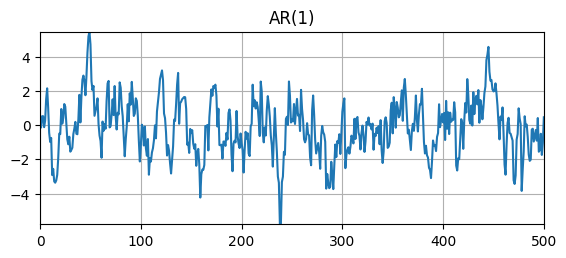

In [2]:
# Libraries
import matplotlib.pyplot as plt
# Plot time series
fig, ax = plt.subplots(figsize=(6.5,2.5))
ax.plot(y)
ax.set_title('AR(1)')
ax.grid(); ax.autoscale(tight=True)

- **Q**: Is this series stationary? (using "eyeball" econometrics)
  1) Is $E(y_t) = \mu$? Maybe, the mean might be stable around 0. Intuitively, if $E(\varepsilon_t)=0$, then we're always adding something with zero mean to something with zero mean, so the mean should be zero, right?
  2) Is $Var(y_t) = \sigma^2$? Maybe, the series looks similarly volatile across the sample.
  3) Is $cov(y_t,y_{t-\tau}) = \gamma(\tau)$? Maybe, I'm not sure how to visualize that.
- **A**: It appears that this time series might be (covariance) stationary. To be clear, all conditions must be satisfied for the series to be stationary.

### ACF of AR(1)

- Now let's use the **auto-correlation function (ACF)** to see if the autocovariance of the artificial data is stable over time. An ACF is also known as a **correlogram**.

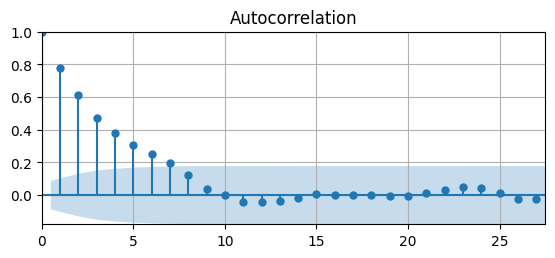

In [3]:
# Libraries
from statsmodels.graphics.tsaplots import plot_acf as acf
# Plot Autocorrelation Function
fig, ax = plt.subplots(figsize=(6.5,2.5))
acf(y,ax)
ax.grid(); ax.autoscale(tight=True)

- The autocorrelation is on the vertical axis and the lags are on the horizontal axis.
- The ACF tapers off quickly as the lag increases and the autocorrelation at large lags are equal, so the time series is covariance stationary.
- i.e., observations far enough in the past are not related to the present

### ACF of White Noise

- What is the ACF of White Noise?
- Set $\rho = 0$ so that $y_t = \varepsilon_t$
- i.e., just plot the ACF of `eps`

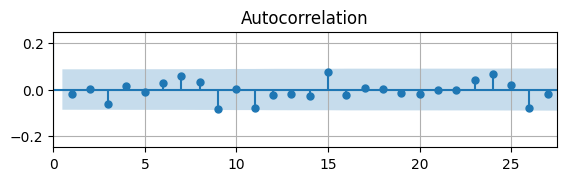

In [4]:
# Plot Autocorrelation Function
fig, ax = plt.subplots(figsize=(6.5,1.5))
acf(eps,ax)
ax.grid(); ax.autoscale(tight=True);
ax.set_ylim([-0.25,0.25]);

- The autocorrelation is not significantly different from zero for all lags.

### Non-Stationary Data

- We can actually prove that our DGP for $y_t$ is covariance stationary.
- So what does non-stationary data look like?
  1) It has a time trend, or seasonality, so that the mean is a function of time.
  2) The variance of the data is changing over time, i.e., heteroscedasticity, or there are sudden changes in variance.
  3) Structural breaks where the mean jumps.
  4) The data "wanders" around and does not appear to revert to a mean, i.e., the data has a "unit root".

### Random Walk
- Suppose in the previous example $\rho = 1$, so that $y_t = y_{t-1} + \varepsilon_t$, which is known as a "random walk".

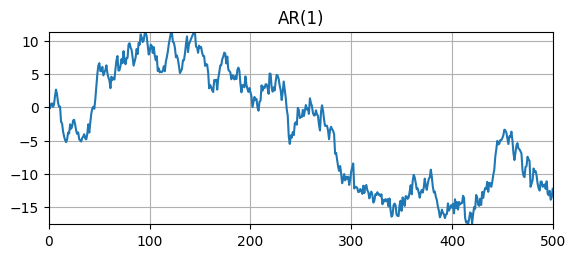

In [5]:
# Reassign rho
rho = 1;
# Simulate time series
y = np.zeros(T)
for t in range(1,T):
    y[t] = rho*y[t-1] + eps[t]
# Plot time series
fig, ax = plt.subplots(figsize=(6.5,2.5))
ax.plot(y)
ax.set_title('AR(1)')
ax.grid(); ax.autoscale(tight=True)

- It looks like the mean and/or variance might be chaning over time, but maybe the sample is just too small/short.

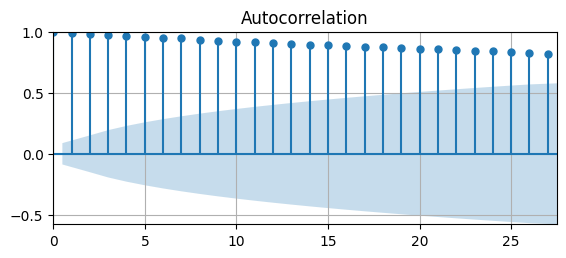

In [6]:
# Plot Autocorrelation Function
fig, ax = plt.subplots(figsize=(6.5,2.5))
acf(y,ax);
ax.grid(); ax.autoscale(tight=True)

- The ACF **does not** taper off quickly as the lag increases and the autocorrelation at large lags are far from zero, so the time series is **not** covariance stationary.
- For a covariance stationary series, the autocorrelations should gradually approach zero as the lag increases, i.e., the influence of past values on the current value diminishes as the time difference between them grows.
- A tapering ACF indicates that the series is not retaining strong memory of its past values and is fluctuating around a stable mean.

### Retail Sales

- We have generated artificial data that is either stationary or non-stationary.
- What about using the ACF on actual data?
- Let's look at Retail Sales from the U.S. Census Bureau.

In [7]:
# Libraries
from fredapi import Fred
import pandas as pd
# Setup acccess to FRED
fred_api_key = pd.read_csv('fred_api_key.txt', header=None)
fred = Fred(api_key=fred_api_key.iloc[0,0])
# Read data
data = fred.get_series('MRTSSM44000USN').to_frame(name='retail')
print(f'number of rows/quarters = {len(data)}')
print(data.head(2)); print(data.tail(2))

number of rows/quarters = 401
              retail
1992-01-01  126717.0
1992-02-01  127022.0
              retail
2025-04-01  623756.0
2025-05-01  647460.0


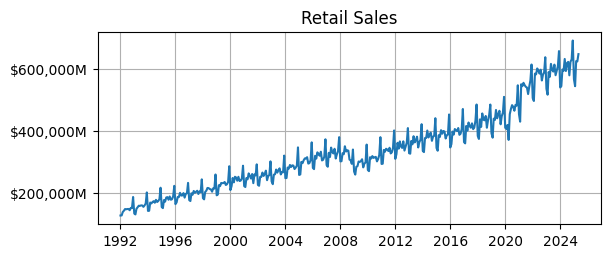

In [8]:
# Plot non-stationary data
fig, ax = plt.subplots(figsize=(6.5,2.5))
ax.plot(data.retail)
ax.set_title('Retail Sales')
ax.yaxis.set_major_formatter('${x:,.0f}M')
ax.grid()

- Is this series stationary? (using "eyeball" econometrics)
  1) Is $E(y_t) = \mu$? No, it is a function of year as well as month during the year (seasonality).
  2) Is $cov(y_t,y_{t-\tau}) = \gamma(\tau)$? No, there appears to be a higher variance at the end of the sample than at the beginning.
- It appears that this time series is non-stationary.
- To be clear, only one of the conditions needs to fail to be non-stationary.

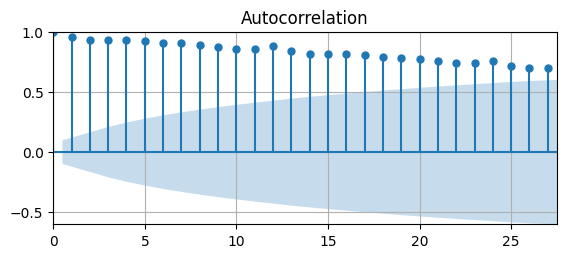

In [9]:
# Plot Autocorrelation Function
fig, ax = plt.subplots(figsize=(6.5,2.5))
acf(data.retail,ax);
ax.grid(); ax.autoscale(tight=True)

- Like the artificial random walk, the ACF of retail sales **does not** taper off quickly as the lag increases and the autocorrelation at large lags are far from zero, so the time series is **not** covariance stationary.

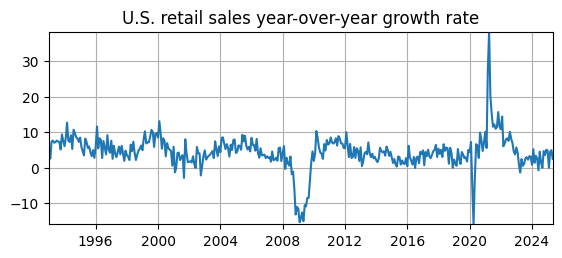

In [10]:
# Retail sales annual growth rate (percent change)
logretail = np.log(data.retail)
dlogretail = 100*(logretail.diff(12))

# Plot non-stationary data
fig, ax = plt.subplots(figsize=(6.5,2.5))
ax.plot(dlogretail.dropna()); 
ax.set_title('U.S. retail sales year-over-year growth rate')
ax.grid(); ax.autoscale(tight=True)

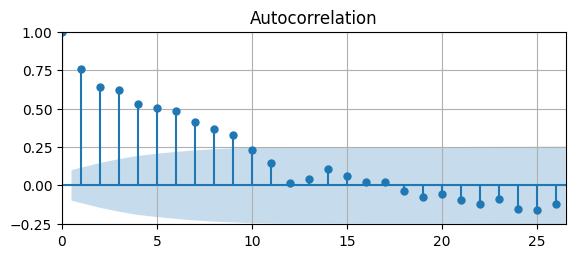

In [11]:
# Plot Autocorrelation Function
fig, ax = plt.subplots(figsize=(6.5,2.5))
acf(dlogretail.dropna(),ax);
ax.grid(); ax.autoscale(tight=True)

## Conclusion

- Data with trends and seasonality is easier to identify as non-stationary, while for a random walk it was more difficult to tell.
- Thus, the ACF is a useful diagnostic for checking whether data is stationary, especially after transforming the data with log and differences.